# 실습 – 모형 훈련 및 평가

# 문제 1: 스팸 이메일 분류

이 예제에서는 이메일을 스팸 또는 스팸 아님으로 분류하는 작업을 수행합니다.

University of California, Irvine(UCI) 기계 학습 리포지토리의 [Spambase Data Set](https://archive.ics.uci.edu/ml/datasets/Spambase)를 사용합니다.

__소스 정보:__

작성자:
Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt, Hewlett-Packard Labs, 1501 Page Mill Rd., Palo Alto, CA 94304

기증자:
George Forman gforman@hpl.hp.com 650-857-7835

----------------------------------------------------------------------------

이 데이터에는 57개의 속성과 1개의 목표가 있으며, 설명은 다음을 참조하십시오.
- word_freq_WORD 유형의 연속 실제 [0,100] 속성 48개 
= 이메일에서 WORD와 일치하는 단어 비율,
즉 100 * (WORD가 이메일에 표시되는 횟수) / 
이메일의 총 단어 수. 이 예제에서 "word"는 
영숫자가 아닌 문자나 문자열 끝에 의해 경계를 이루는 
영숫자 문자열입니다.

- char_freq_CHAR 유형의 연속 실제 [0,100] 속성 6개
= 이메일에서 CHAR와 일치하는 문자 비율,
즉 100 * (CHAR 발생 횟수)/이메일의 총 문자 수

- capital_run_length_average 유형의 연속 실제 [1,...] 속성 1개
= 연속적 대문자 시퀀스의 평균 길이

- capital_run_length_longest 유형의 연속 정수 [1,...] 속성 1개
= 가장 긴 연속적 대문자 시퀀스 길이

- capital_run_length_total 유형의 연속 정수 [1,...] 속성 1개
= 연속적 대문자 시퀀스 길이의 합계
= 이메일의 총 대문자 수

- 스팸 유형의 명목 {0,1} 클래스 속성 1개
= 이메일이 스팸으로 간주되었는지(1) 그렇지 않은지(0), 즉 원하지 않는 상업적 이메일인지 여부를 나타냅니다.  

## 1. 데이터 가져오기

In [1]:
import subprocess
import os

# 파일이 이미 원하는 경로에 있는지 아니면 다운로드해야 하는지 확인
# 소스에서 다운로드한 파일: https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data

base_path = '/home/ec2-user/SageMaker/data/'
file_path = 'spambase.data'

if not os.path.isfile(base_path + file_path):
    subprocess.run(['mkdir', '-p', base_path])
    subprocess.run(['aws', 's3', 'cp', 
                    's3://aws-tc-largeobjects/ILT-TF-200-MLDWTS/lab3/', 
                    base_path,'--recursive'])
else:
    print('File already downloaded!')

In [2]:
import csv
import numpy as np

data = []

f = open('/home/ec2-user/SageMaker/data/spambase.data')
reader = csv.reader(f)
next(reader, None)
for row in reader:
    data.append(row)
f.close()

시각화 및 분석이 용이하도록 DataFrame에 데이터를 작성합니다. 또한 데이터 집합 패키지의 "spambase.names" 파일에 있는 속성 이름을 추가합니다.

In [3]:
import pandas as pd

df = pd.DataFrame(data=np.array(data).astype(np.float), columns=["word_freq_make",
            "word_freq_address",
            "word_freq_all",
            "word_freq_3d",
            "word_freq_our",
            "word_freq_over",
            "word_freq_remove",
            "word_freq_internet",
            "word_freq_order",
            "word_freq_mail",
            "word_freq_receive",
            "word_freq_will",
            "word_freq_people",
            "word_freq_report",
            "word_freq_addresses",
            "word_freq_free",
            "word_freq_business",
            "word_freq_email",
            "word_freq_you",
            "word_freq_credit",
            "word_freq_your",
            "word_freq_font",
            "word_freq_000",
            "word_freq_money",
            "word_freq_hp",
            "word_freq_hpl",
            "word_freq_george",
            "word_freq_650",
            "word_freq_lab",
            "word_freq_labs",
            "word_freq_telnet",
            "word_freq_857",
            "word_freq_data",
            "word_freq_415",
            "word_freq_85",
            "word_freq_technology",
            "word_freq_1999",
            "word_freq_parts",
            "word_freq_pm",
            "word_freq_direct",
            "word_freq_cs",
            "word_freq_meeting",
            "word_freq_original",
            "word_freq_project",
            "word_freq_re",
            "word_freq_edu",
            "word_freq_table",
            "word_freq_conference",
            "char_freq_;",
            "char_freq_(",
            "char_freq_[",
            "char_freq_!",
            "char_freq_$",
            "char_freq_#",
            "capital_run_length_average",
            "capital_run_length_longest",
            "capital_run_length_total",
            "target"]
            )

데이터의 형태를 살펴봅니다. 예상대로 58개의 열(목표 포함)이 있습니다.

In [4]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0,1.0
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0,1.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0,1.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0,1.0
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0,1.0


`df.describe()` 함수는 특성에 대한 통계적 요약을 제공합니다.

In [5]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,...,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,...,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000000,265.250000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


## 2. 모형 훈련

이 섹션에서는 다음 작업을 수행합니다.

- 데이터 집합을 훈련, 검증 및 검정 하위 집합으로 분할
- Amazon SageMaker 선형 학습자 알고리즘을 사용하여 모형 훈련

> ### 질문 1 – 훈련-검정-검증 분할
>
> 기계 학습 모형 훈련에서는 데이터를 훈련, 검증 및 검정 하위 집합으로 분할하는 것이 중요합니다. `sklearn` 라이브러리에서 `train_test_split()` 함수([설명서](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))를 사용합니다.

> 다음 예제를 살펴봅니다.
>
> `train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size=0.2)` 
>
> 이 함수는 입력 특성 `X`와 목표 `y` 쌍을 주어진 비율(test_size)로 분할합니다. 이 특정 예제에서는 데이터를 훈련(80%) 하위 집합과 검정(20%) 하위 집합으로 분할합니다.
>
> 이 함수를 __두 번__ 사용하여 데이터를 __훈련(80%)__, __검증(10%)__ 및 __검정(10%)__ 하위 집합으로 분할합니다.

In [6]:
from sklearn.model_selection import train_test_split

# 목표 열(포함되지 않음)까지 특성 값을 가져옵니다.
X = df.values[:, :-1].astype(np.float32)

# 목표 열을 가져옵니다.
y = df.values[:, -1].astype(np.float32)

# 훈련용 데이터로 80%를 가져옵니다. 나머지 20%는 검증 및 검정용입니다.
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size=0.2)

# 나머지 20%의 데이터를 검정용 10%와 검증용 10%로 분할합니다.
test_features, val_features, test_labels, val_labels = train_test_split(test_features, test_labels, test_size=0.5)

print(f"Length of train_features is: {train_features.shape}")
print(f"Length of train_labels is: {train_labels.shape}")
print(f"Length of val_features is: {val_features.shape}")
print(f"Length of val_labels is: {val_labels.shape}")
print(f"Length of test_features is: {test_features.shape}")
print(f"Length of test_labels is: {test_labels.shape}")

Length of train_features is: (3680, 57)
Length of train_labels is: (3680,)
Length of val_features is: (460, 57)
Length of val_labels is: (460,)
Length of test_features is: (460, 57)
Length of test_labels is: (460,)


이제 Amazon SageMaker `LinearLearner()` 알고리즘을 호출합니다. 이 예제에서는 훈련에 `ml.m4.xlarge` 인스턴스를 사용합니다. "스팸"과 "스팸 아님"의 두 가지 클래스가 있기 때문에 `predictor_type`은 __'binary_classifier'__로 설정되어 있습니다.

In [7]:
import sagemaker

# LinearLearner 추정기 객체 호출
binary_estimator = sagemaker.LinearLearner(role=sagemaker.get_execution_role(),
                                               instance_count=1,
                                               instance_type='ml.m4.xlarge',
                                               predictor_type='binary_classifier')

binary_estimator의 `record_set()` 함수를 사용하여 추정기의 훈련, 검증 및 검정 부분을 설정합니다. 

In [8]:
train_records = binary_estimator.record_set(train_features, train_labels, channel='train')
val_records = binary_estimator.record_set(val_features, val_labels, channel='validation')
test_records = binary_estimator.record_set(test_features, test_labels, channel='test')

`fit()` 함수는 확률적 경사 하강법(SGD) 알고리즘의 분산 버전을 적용하며 우리는 데이터를 이 알고리즘에 전송합니다.

In [9]:
binary_estimator.fit([train_records, val_records, test_records])

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


2020-11-11 14:35:36 Starting - Starting the training job...
2020-11-11 14:35:38 Starting - Launching requested ML instances......
2020-11-11 14:36:49 Starting - Preparing the instances for training......
2020-11-11 14:37:58 Downloading - Downloading input data......
2020-11-11 14:39:01 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
[11/11/2020 14:39:06 INFO 140570661291840] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'loss_insensitivity': u'0.01', u'epochs': u'15', u'feature_dim': u'auto', u'init_bias': u'0.0', u'lr_scheduler_factor': u'auto', u'num_calibration_samples': u'10000000', u'accuracy_top_k': u'3', u'_num_kv_servers': u'auto', u'use_bias': u'true', u'num_point_for_scaler': u'10000', u'_log_level': u'info', u'quantile': u'0.5', u'bias_lr_mult': u'auto', u'lr_scheduler_step': u'auto', u'in


2020-11-11 14:39:24 Uploading - Uploading generated training model
2020-11-11 14:39:24 Completed - Training job completed
Training seconds: 86
Billable seconds: 86


## 3. 모형 평가

이 섹션에서는 모형이 검정 데이터 집합에서 어떤 성능을 발휘하는지 살펴봅니다. 

### Amazon SageMaker 분석
`sagemaker.analytics`를 사용하여 일부 성능 지표를 확보할 수 있습니다. 모형을 배포할 필요는 없습니다. 이는 분류 문제이므로 정확도, 정밀도 및 재현율을 확인할 수 있습니다.

In [10]:
sagemaker.analytics.TrainingJobAnalytics(binary_estimator._current_job_name, 
                                         metric_names = ['test:binary_classification_accuracy', 
                                                         'test:precision', 
                                                         'test:recall']
                                        ).dataframe()

,timestamp,metric_name,value
0,0.0,test:binary_classification_accuracy,0.939130
1,0.0,test:precision,0.952941
2,0.0,test:recall,0.890110


### 모형 배포
모형을 배포하려면 다음 셀을 실행합니다.

**참고:** 이 작업은 완료하는 데 다소 시간이 걸립니다. 기다리는 동안 질문 2의 답을 생각해 보십시오.

In [11]:
binary_predictor = binary_estimator.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


---------------!

> ### 질문 2 – 평가 지표 선택
> 평가 지표를 선택할 때는 비즈니스 및 관련 제한 사항을 고려해야 합니다. 이 예제인 스팸 탐지에서는 오탐(FP)에 주의해야 합니다. 오탐(FP)은 좋은 이메일이 스팸 이메일로 분류되었음을 의미합니다. 스팸 이메일은 일반적으로 스팸 폴더로 이동하므로 사용자는 오탐(FP)으로 중요한 정보를 잃을 수 있습니다.

> 잘 알려진 일부 평가 지표는 다음과 같습니다.
- 정확도 = (TP+TN)/(TP+FP+FN+TN)
- 정밀도 =(TP)/(TP+FP)
- 재현율 =(TP)/(TP+FN)
>
> 제공된 정보에 비추어 볼 때 제공된 지표 중 어떤 것이 가장 적합하다고 생각하시나요?

**답변:** 여기에서는 오탐(FP)을 설명하는 정밀도를 지표로 선택합니다. 높은 정밀도는 높은 TP와 낮은 FP를 의미합니다.

이제 호스팅된 엔드포인트가 실행되고 있으므로 간단하게 http POST 요청을 통해 모형에서 실시간 예측을 손쉽게 수행할 수 있습니다. 먼저 `test_features` NumPy 배열을 엔드포인트 뒤의 모형에 전달하기 위해 직렬 변환 및 역직렬 변환을 설정해야 합니다. 또한 모형의 혼동 행렬을 계산하여 검정 데이터에서 어떤 성능을 발휘했는지 평가합니다.

> ### 질문 3 – 지표 계산
>
> 이 질문에서는 몇 가지 중요한 평가 지표를 계산해야 합니다. 정확도 계산이 예제로 사용되었습니다. 정확도 다음에 정밀도와 재현율을 계산합니다.
>
>**힌트:** 이 섹션의 시작 부분에서 얻은 `sagemaker.analytics` 결과를 통해 계산된 값을 확인할 수 있습니다.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 크기가 25인 각 배치에 대한 예측 가져오기
def predict_batches(predictor, features, labels):
    prediction_batches = [predictor.predict(batch) for batch in np.array_split(features, 25)]
    # protobuf 응답을 구문 분석하여 예측된 레이블 추출
    extract_label = lambda x: x.label['predicted_label'].float32_tensor.values
    preds = np.concatenate([np.array([extract_label(x) for x in batch]) for batch in prediction_batches])
    preds = preds.reshape((-1,))

    # 정확도, 정밀도 및 재현율 계산
    accuracy = (preds == labels).sum() / len(labels)
    print(f'Accuracy: {accuracy}')
    
    # 정밀도 계산
    precision = (preds[preds == 1] == labels[preds == 1]).sum() / len(preds[preds == 1])
    print(f'Precision: {precision}')
    
    # 재현율 계산
    recall = (preds[preds == 1] == labels[preds == 1]).sum() / len(labels[labels == 1])
    print(f'Recall: {recall}')
    
    confusion_matrix = pd.crosstab(index=labels, columns=np.round(preds), rownames=['True'], colnames=['predictions']).astype(int)
    plt.figure(figsize = (5,5))
    sns.heatmap(confusion_matrix, annot=True, fmt='.2f', cmap="YlGnBu").set_title('Confusion Matrix') 

훈련 성능 확인

Accuracy: 0.9244565217391304
Precision: 0.9172560113154172
Recall: 0.8895747599451304


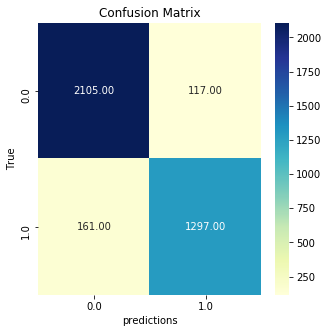

In [13]:
predict_batches(binary_predictor, train_features, train_labels)

검정 성능 확인

Accuracy: 0.9391304347826087
Precision: 0.9529411764705882
Recall: 0.8901098901098901


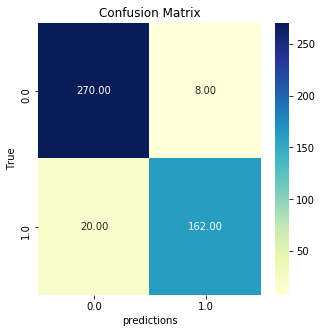

In [14]:
predict_batches(binary_predictor, test_features, test_labels)

> ### 질문 4 – 훈련-검정 결과 비교
> 훈련 성능과 검정 성능 사이에 큰 차이가 있나요?

**답변**: 두 성능은 매우 비슷합니다. 여기서는 과대적합을 경험하지 않았습니다.

## 4. 결론
이 연습에서는 Amazon SageMaker의 선형 학습 알고리즘을 사용하여 이진 분류자를 개발했습니다. 또한 훈련, 검증 및 검정 분할, 혼동 행렬, 분류 지표와 같은 중요한 개념을 검토했습니다. 전반적으로 이 모형은 정확도, 정밀도 및 재현율 지표에서 90% 이상을 기록했습니다.

----------------------------------------------------------------------------
# 문제 2: 당뇨병 진행 예측(회귀)

회귀 문제의 경우 건강 관련 데이터 집합을 사용하여 당뇨병을 예측합니다.

[Diabetes Data](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)를 사용합니다.

__Scikit-learn__ 라이브러리에도 이 데이터가 호스팅되어 있습니다. 이 라이브러리를 사용하여 데이터 집합을 로드합니다. 

이 데이터 집합의 필드:  

입력:  
1 - age  
2 - sex  
3 – bmi(신체 질량 지수)  
4 – bp(혈압)  
5 – s1(혈청 측정 1)  
6 – s2(혈청 측정 2)  
7 – s3(혈청 측정 3)   
8 – s4(혈청 측정 4)  
9 – s5(혈청 측정 5)  
10 – s6(혈청 측정 6)

출력:  
11 – y(기준 1년 후 질병 경과에 대한 양적 측도)  

## 1. 데이터 가져오기

In [15]:
import numpy as np
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X, y = diabetes.data.astype(np.float32), diabetes.target.astype(np.float32)

print("X shape:", X.shape)
print("Y shape:", y.shape)

X shape: (442, 10)
Y shape: (442,)


In [16]:
import pandas as pd

df = pd.DataFrame(data=np.column_stack((X, y)), 
                  columns=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'y']
                 )

**참고:** 이러한 특성들은 사전에 정규화 및 척도화됩니다. 

In [17]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


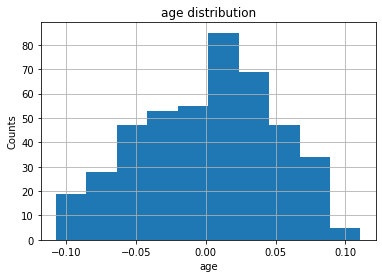

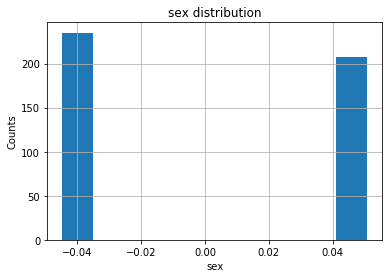

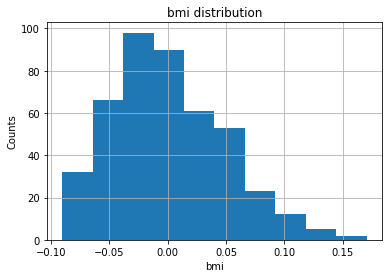

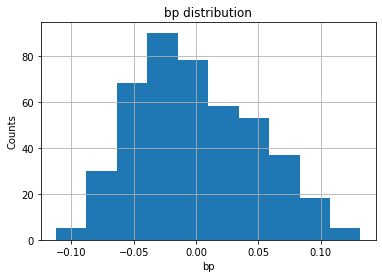

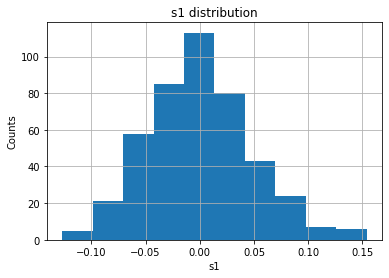

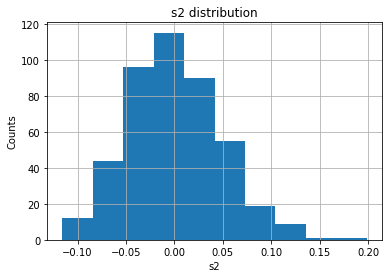

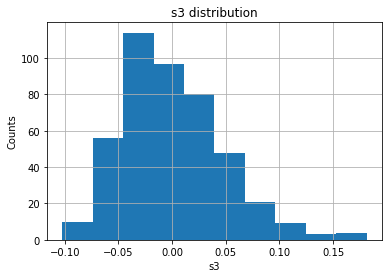

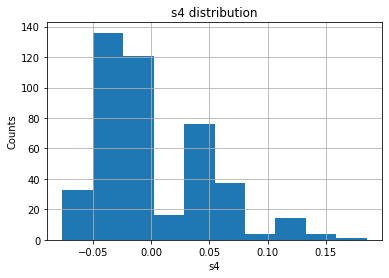

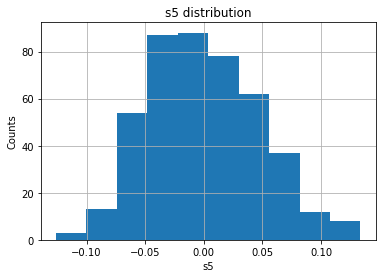

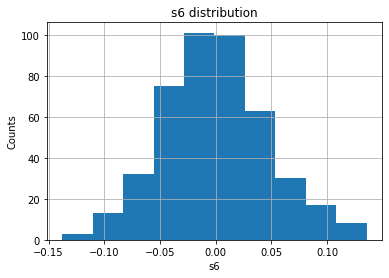

In [18]:
import matplotlib.pyplot as plt
#%matplotlib inline
for col in ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']:
    plt.hist(df[col].values)
    plt.title(col + ' distribution')
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.grid(True)
    plt.show()

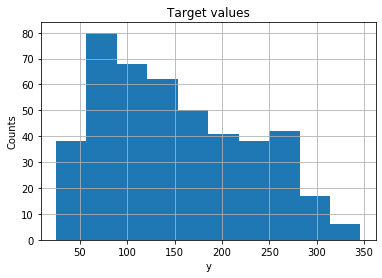

In [19]:
import matplotlib.pyplot as plt
#%matplotlib inline
plt.hist(y)
plt.title('Target values')
plt.xlabel('y')
plt.ylabel('Counts')
plt.grid(True)
plt.show()

## 2. 모형 훈련

이 섹션에서는 다음 작업을 수행합니다.

- 데이터 집합을 훈련, 검증 및 검정 하위 집합으로 분할
- Amazon SageMaker 선형 학습자 알고리즘을 사용하여 모형 훈련

> ### 질문 1 – 훈련-검정-검증 분할
>
> 기계 학습 모형 훈련에서는 데이터를 훈련, 검증 및 검정 하위 집합으로 분할하는 것이 중요합니다. 'sklearn' 라이브러리의 `train_test_split()` 함수[설명서](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)를 사용합니다.

> 다음 예제를 살펴봅니다.
>
> `train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size=0.2)` 
>
> 이 함수는 입력 특성 `X`와 목표 `y` 쌍을 주어진 비율(test_size)로 분할합니다. 이 특정 예제에서는 데이터를 훈련(80%) 하위 집합과 검정(20%) 하위 집합으로 분할합니다.
>
> 이 함수를 __두 번__ 사용하여 데이터를 __훈련(80%)__, __검증(10%)__ 및 __검정(10%)__ 하위 집합으로 분할합니다.

In [20]:
from sklearn.model_selection import train_test_split

# 훈련용 데이터로 80%를 가져옵니다. 나머지 20%는 검증 및 검정용입니다.
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size=0.2)

# 나머지 20%의 데이터를 검정용 10%와 검증용 10%로 분할합니다.
test_features, val_features, test_labels, val_labels = train_test_split(test_features, test_labels, test_size=0.5)

print(f"Length of train_features is: {train_features.shape}")
print(f"Length of train_labels is: {train_labels.shape}")
print(f"Length of val_features is: {val_features.shape}")
print(f"Length of val_labels is: {val_labels.shape}")
print(f"Length of test_features is: {test_features.shape}")
print(f"Length of test_labels is: {test_labels.shape}")

Length of train_features is: (353, 10)
Length of train_labels is: (353,)
Length of val_features is: (45, 10)
Length of val_labels is: (45,)
Length of test_features is: (44, 10)
Length of test_labels is: (44,)


이제 Amazon SageMaker `LinearLearner()` 알고리즘을 호출합니다. 이 예제에서는 훈련에 `ml.m4.xlarge` 인스턴스를 사용합니다. 회귀 문제이므로 `predictor_type`은 __'regressor'__로 설정됩니다.

In [21]:
import sagemaker

# LinearLearner 추정기 객체 호출
regression_model = sagemaker.LinearLearner(role=sagemaker.get_execution_role(),
                                               instance_count=1,
                                               instance_type='ml.m4.xlarge',
                                               predictor_type='regressor')

binary_estimator의 `record_set()` 함수를 사용하여 추정기의 훈련, 검증 및 검정 부분을 설정합니다. 

In [22]:
train_records = regression_model.record_set(train_features, train_labels, channel='train')
val_records = regression_model.record_set(val_features, val_labels, channel='validation')
test_records = regression_model.record_set(test_features, test_labels, channel='test')

`fit()` 함수는 이 데이터에 회귀를 적용합니다.

In [23]:
regression_model.fit([train_records, val_records, test_records])

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


2020-11-11 14:47:29 Starting - Starting the training job...
2020-11-11 14:47:32 Starting - Launching requested ML instances......
2020-11-11 14:48:56 Starting - Preparing the instances for training.........
2020-11-11 14:50:14 Downloading - Downloading input data...
2020-11-11 14:51:00 Training - Downloading the training image...
2020-11-11 14:51:31 Uploading - Uploading generated training modelDocker entrypoint called with argument(s): train
Running default environment configuration script
[11/11/2020 14:51:25 INFO 140470689392448] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'loss_insensitivity': u'0.01', u'epochs': u'15', u'feature_dim': u'auto', u'init_bias': u'0.0', u'lr_scheduler_factor': u'auto', u'num_calibration_samples': u'10000000', u'accuracy_top_k': u'3', u'_num_kv_servers': u'auto', u'use_bias': u'true', u'num_point_for_scaler': u'10000', u'_log_level': u'info', u'quantile': u'0.5', u'bias_lr_mult': u

[2020-11-11 14:51:27.799] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/validation", "epoch": 44, "duration": 19, "num_examples": 1, "num_bytes": 3780}
[11/11/2020 14:51:27 INFO 140470689392448] #early_stopping_criteria_metric: host=algo-1, epoch=13, criteria=mse_objective, value=3051.94722222
[2020-11-11 14:51:27.817] [tensorio] [info] epoch_stats={"data_pipeline": "/opt/ml/input/data/validation", "epoch": 46, "duration": 2, "num_examples": 1, "num_bytes": 3780}
[11/11/2020 14:51:27 INFO 140470689392448] #validation_score (algo-1) : ('mse_objective', 2720.1927083333335)
[11/11/2020 14:51:27 INFO 140470689392448] #validation_score (algo-1) : ('mse', 2720.1927083333335)
[11/11/2020 14:51:27 INFO 140470689392448] #validation_score (algo-1) : ('absolute_loss', 44.81302083333333)
[11/11/2020 14:51:27 INFO 140470689392448] #quality_metric: host=algo-1, validation mse_objective <loss>=2720.19270833
[11/11/2020 14:51:27 INFO 140470689392448] #quality_metric: host=algo-1,

## 3. 모형 평가

이 섹션에서는 모형이 검정 데이터 집합에서 어떤 성능을 발휘하는지 살펴봅니다. 

### Amazon SageMaker 분석
`sagemaker.analytics`를 사용하여 일부 성능 지표를 확보할 수 있습니다. 모형을 배포할 필요는 없습니다. 이는 분류 문제이므로 **평균 제곱 오차**를 확인할 수 있습니다.

In [24]:
sagemaker.analytics.TrainingJobAnalytics(regression_model._current_job_name, 
                                         metric_names = ['test:mse']
                                        ).dataframe()

,timestamp,metric_name,value
0,0.0,test:mse,3496.893821


### 모형 배포
모형을 배포하려면 다음 셀을 실행합니다.

**참고:** 이 작업은 완료하는 데 다소 시간이 걸립니다. 기다리는 동안 질문 2의 답을 생각해 보십시오.

In [25]:
regression_predictor = regression_model.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


---------------!

> ## 질문 2 – 평균 제곱 오차 계산
>
> 이 질문에서는 평균 제곱 오차를 계산합니다. 해당 방정식은 다음과 같습니다.
>
> 평균 제곱 오차 = $\displaystyle\frac{1}{n}\sum_{t=1}^{n}(pred_t-target_t)^2$
>
> __preds__ 및 __labels__ 변수를 사용하여 평균 제곱 오차를 계산하고 인쇄합니다.

In [26]:
import matplotlib.pyplot as plt

# 크기가 25인 각 배치에 대한 예측 가져오기
def predict_regression_batches(predictor, features, labels):
    prediction_batches = [predictor.predict(batch) for batch in np.array_split(features, 25)]
    
    # protobuf 응답을 구문 분석하여 예측된 레이블 추출
    extract_score = lambda x: x.label['score'].float32_tensor.values
    preds = np.concatenate([np.array([extract_score(x) for x in batch]) for batch in prediction_batches])
    preds = preds.reshape((-1,))
    
    # 평균 제곱 오차 계산
    mse = sum((preds - labels)**2) / len(preds)
    print(mse)
    
    return preds

이제 훈련 및 검정 하위 집합에 대한 결과를 가져옵니다.

In [27]:
train_predictions = predict_regression_batches(regression_predictor, train_features, train_labels)

3405.6895263421357


In [28]:
test_predictions = predict_regression_batches(regression_predictor, test_features, test_labels)

3496.893861337385


### 결과 표시

플롯을 몇 가지 살펴보죠. 평균 제곱 오차를 계산했더라도 결과를 시각적으로 검사하는 것이 좋습니다.

### 산점도

산점도를 사용하면 적합(예측) 값과 실제 값을 비교할 수 있습니다. 다음 그림에서는 예측 값과 실제 값이 전체적으로 유사한 패턴을 따랐음을 확인할 수 있습니다.

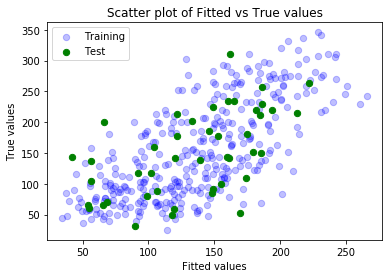

In [29]:
import matplotlib.pyplot as plt
#%matplotlib inline

plt.scatter(train_predictions, train_labels, c='b', s=40, alpha=0.25, label='Training')
plt.scatter(test_predictions, test_labels, c='g', s=40, label='Test')
plt.title("Scatter plot of Fitted vs True values")
plt.ylabel("True values")
plt.xlabel("Fitted values")
plt.legend(loc='best')
plt.show()

### 잔차 플롯

모든 데이터 포인트에는 잔차가 있습니다. 잔차는 실제 값과 예측 값의 차이입니다. 잔차는 다음과 같이 계산됩니다.  
$e = y - \hat y$  

양의 잔차는 실제 값보다 예측 값이 높다는 것을 의미하고, 음의 잔차는 실제 값보다 예측 값이 낮다는 것을 의미합니다.    

다음 블록을 실행하여 잔차 플롯을 살펴보십시오. 잔차에는 랜덤 패턴이 있는데, 이는 좋은 현상입니다. 다른 패턴으로는 U자형 또는 역 U자형의 패턴이 있습니다. 이 두 패턴은 데이터의 비선형성을 가리키며, 이는 수정되어야 합니다. 이 예제에서는 비선형성 문제가 없습니다. 

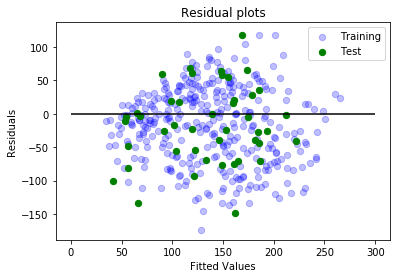

In [30]:
import matplotlib.pyplot as plt
#%matplotlib inline

plt.scatter(train_predictions, train_predictions-train_labels, c='b', s=40, alpha=0.25, label='Training')
plt.scatter(test_predictions, test_predictions-test_labels, c='g', s=40, label='Test')
plt.hlines(y=0, xmin=0, xmax=300)
plt.title("Residual plots")
plt.ylabel("Residuals")
plt.xlabel("Fitted Values")
plt.legend(loc='best')
plt.show()

> ### 질문 3: 잔차 플롯 평가
>
> 일반적으로 잔차 플롯을 보면 패턴을 확인할 수 있습니다. 패턴은 다음과 같습니다.
> – 랜덤: 데이터가 선형이라는 의미입니다.
> – U자형 또는 역 U자형: 데이터에 비선형성이 있음을 나타냅니다.
>
> 이 잔차 플롯에서 어떤 결론을 내릴 수 있나요?

**답변**: 이 잔차 플롯은 랜덤 잔차를 보여주며, 이는 데이터가 선형임을 의미합니다.

## 4. 결론
이 연습에서는 Amazon SageMaker의 선형 학습 알고리즘을 사용하여 회귀 모형을 개발했습니다. 또한 훈련, 검증 및 검정 분할, 평균 제곱 오차 회귀 지표, 잔차 오차 분석과 같은 중요한 개념을 다루었습니다.